 __시계열수치로 이진분류모델 구성하기__

### 1. 데이터셋 준비

In [6]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=20000)
    # 빈도수가 높은 단어 20000개를 위주로 데이터셋 생성하기(?)

In [3]:
X_train[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [12]:
# 훈련셋 검증셋 나누기

X_val = X_train[20000:]
y_val = y_train[20000:]
X_train = X_train[:20000]
y_train = y_train[:20000]

In [10]:
from tensorflow.keras.preprocessing import sequence

In [32]:
max_features = 20000
text_max_words = 200

In [33]:
# 문장의 길이 맞추기

X_train = sequence.pad_sequences(X_train, maxlen=text_max_words) # 문장의 길이를 200을 맞춰줌
X_val = sequence.pad_sequences(X_val, maxlen=text_max_words)
X_test = sequence.pad_sequences(X_test, maxlen=text_max_words)

### 2. 레이어 준비
- Embedding (벡터화)
- Conv1D
- GlobalMaxPooling1D
- MaxPooling1D

__Embedding layer__  
- input_dim : 단어 사전의 크기
- output_dim : 임베딩 벡터의 크기
- input_length : 입력 시퀀스의 길이 (다음에 플래튼 레이어가 온다면 반드시 지정해줘야!)

#### 1) 다층퍼셉트론 신경망 모델

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D

In [34]:
model = Sequential()
model.add(Embedding(20000, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
hist = model.fit(X_train, y_train, epochs=2, batch_size=64, 
                 validation_data=(X_val, y_val))

Epoch 1/2
313/313 [==============================] - 33s 104ms/step - loss: 0.4125 - accuracy: 0.7952 - val_loss: 0.3252 - val_accuracy: 0.8558
Epoch 2/2
313/313 [==============================] - 32s 102ms/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.4343 - val_accuracy: 0.8484


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

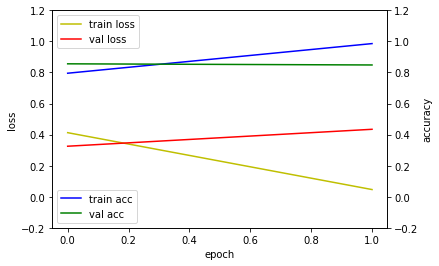

In [40]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [41]:
# 모델 평가하기

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

391/391 [==============================] - 8s 20ms/step - loss: 0.4362 - accuracy: 0.8487
## evaluation loss and metrics ##
[0.4361690878868103, 0.8486800193786621]


#### 2) 순환 신경망 모델

In [42]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128))  # 여기서 타임스텝은 200, 특징 크기는 128
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
hist = model.fit(X_train, y_train, epochs=2, batch_size=64,
                validation_data=(X_val, y_val))

Epoch 1/2
313/313 [==============================] - 164s 523ms/step - loss: 0.4326 - accuracy: 0.7928 - val_loss: 0.4331 - val_accuracy: 0.8070
Epoch 2/2
313/313 [==============================] - 157s 501ms/step - loss: 0.2280 - accuracy: 0.9144 - val_loss: 0.3631 - val_accuracy: 0.8692


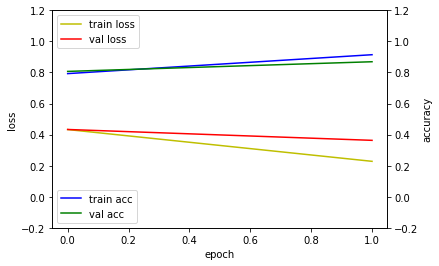

In [47]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [46]:
# 모델 평가하기

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

391/391 [==============================] - 78s 201ms/step - loss: 0.3873 - accuracy: 0.8606
## evaluation loss and metrics ##
[0.3872826099395752, 0.8605999946594238]


#### 3) 컨볼루션 신경망 모델 
- 위치에 상관없이 지역적인 특징을 잘 뽑아냄
- GlobalMaxPooling 레이어는 문장을 훑어가면서 나온 특징벡터들 중 가장 큰 벡터를 골라줌 (즉, 문맥을 보면서 주요 특징을 뽑아내고, 그 중 가장 두드러지는 특징을 고름)

In [48]:
model = Sequential()
model.add(Embedding(20000, 128, input_length=200))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
hist = model.fit(X_train, y_train, epochs=2, batch_size=64,
                validation_data=(X_val, y_val))

Epoch 1/2
313/313 [==============================] - 55s 176ms/step - loss: 0.4587 - accuracy: 0.7666 - val_loss: 0.3001 - val_accuracy: 0.8694
Epoch 2/2
313/313 [==============================] - 54s 173ms/step - loss: 0.2187 - accuracy: 0.9151 - val_loss: 0.2738 - val_accuracy: 0.8884


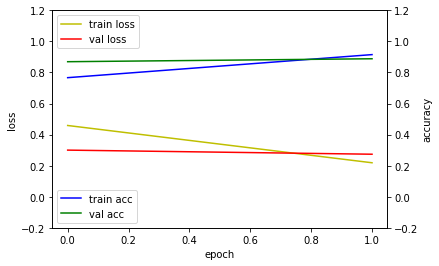

In [51]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [52]:
# 모델 평가하기

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

391/391 [==============================] - 14s 36ms/step - loss: 0.2879 - accuracy: 0.8793
## evaluation loss and metrics ##
[0.28792479634284973, 0.8792799711227417]


#### 4) 순환 컨볼루션 신경망 모델

In [53]:
model = Sequential()
model.add(Embedding(20000, 128, input_length=200))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
    # 특징벡터의 크기를 줄여주는 것이 아니라 특징벡터 수를 1/4로 줄여줌 
    # 200개의 단어가 Conv1D를 통해 198개로, 맥스풀링층을 통해 49개로
model.add(LSTM(128))  # timestep이 49, 속성(특징크기)은 256
model.add(Dense(1, activation='sigmoid'))
    # input_dim의 크기(단어 사전 크기)는 256 그대로

In [54]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
hist = model.fit(X_train, y_train, epochs=2, batch_size=64,
                validation_data=(X_val, y_val))

Epoch 1/2
313/313 [==============================] - 91s 292ms/step - loss: 0.4043 - accuracy: 0.8077 - val_loss: 0.3152 - val_accuracy: 0.8744
Epoch 2/2
313/313 [==============================] - 90s 288ms/step - loss: 0.1849 - accuracy: 0.9328 - val_loss: 0.3159 - val_accuracy: 0.8766


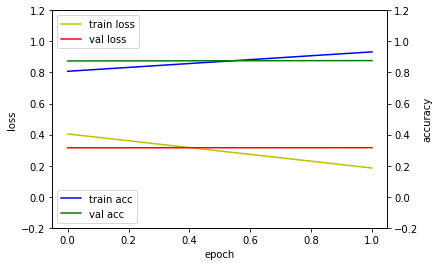

In [56]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [57]:
# 모델 평가하기

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

391/391 [==============================] - 29s 75ms/step - loss: 0.3451 - accuracy: 0.8596
## evaluation loss and metrics ##
[0.34512290358543396, 0.8596400022506714]
